<a href="https://colab.research.google.com/github/omerkucukacar/bby261FinalProjesi/blob/master/bby261FinalProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#okunacak kütüphanaler
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import Image


In [0]:
mnist = mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

In [0]:
# El yazısının tahmin edileceği rakamlar
el_yazisi = [
               '0', 
              '1', 
               '2',
               '3', 
              '4',
               '5',
               '6', 
               '7',
               '8', 
               '9']



               

In [176]:
x_train.shape


(60000, 28, 28)

In [177]:
len(y_train)

60000

In [178]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [179]:
x_test.shape

(10000, 28, 28)

In [180]:
len(y_test)

10000

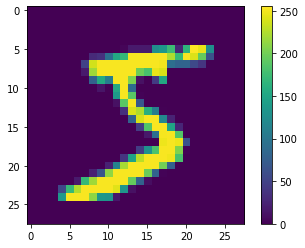

In [181]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

# El yazısı Şeklinde Grafiği göster
plt.show()


In [0]:
x_train = x_train / 255.0

x_test = x_test / 255.0

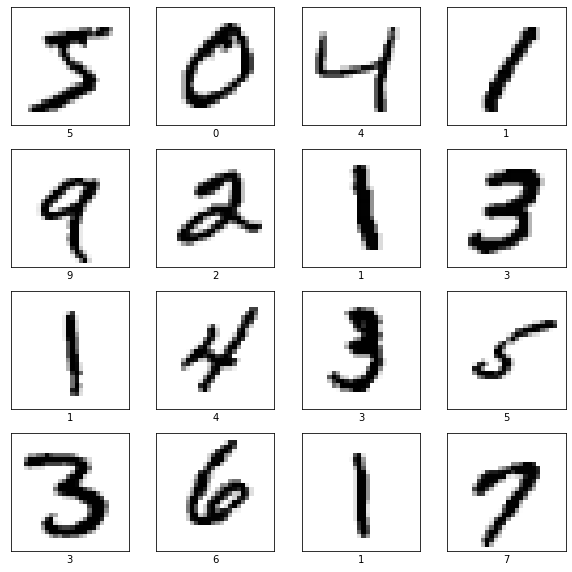

In [183]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(el_yazisi[y_train[i]])
plt.show()

In [0]:
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [0]:
benimmodelim= Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
benimmodelim.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [187]:
benimmodelim.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [188]:
benimmodelim.fit(x_train, y_train, epochs=10 )


Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 2.3016 - acc: 0.1119
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 2.3014 - acc: 0.1124
Epoch 3/10
60000/60000 [==============================] - 7s 110us/step - loss: 2.3014 - acc: 0.1124
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 2.3013 - acc: 0.1124
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 2.3014 - acc: 0.1124
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 2.3014 - acc: 0.1124
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 2.3014 - acc: 0.1124
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 2.3013 - acc: 0.1124
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 2.3013 - acc: 0.1124
Epoch 10/10
60000/60000 [==============================] - 6s 108us/step - loss: 2.3014 - a

In [189]:
Test_kayiplari, test_sonuc = benimmodelim.evaluate(x_test,  y_test, verbose=2)

print('Test sonucu doğruluğu=', test_sonuc)

Test sonucu doğruluğu= 0.1135


In [190]:
y_test[0]

7

In [0]:
sonuc_tahmin = benimmodelim.predict(X_test)

In [192]:
sonuc_tahmin[0]

array([0.0000000e+00, 6.0610863e-09, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 9.9999845e-01, 1.5696769e-06,
       2.6876360e-21, 1.0041737e-21], dtype=float32)

In [193]:
np.argmax(sonuc_tahmin[0])

6

In [194]:
y_test[0]

7

In [0]:
def plot_image(i, sonuc_tahmin_array, true_label, img):
  sonuc_tahmin_array, true_label, img = sonuc_tahmin_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(sonuc_tahmin_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(el_yazisi[predicted_label],
                                100*np.max(sonuc_tahmin_array),
                                el_yazisi[true_label]),
                                color=color)

def plot_value_array(i, sonuc_tahmin_array, true_label):
  sonuc_tahmin_array, true_label = sonuc_tahmin_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), sonuc_tahmin_array, color="black")
  plt.ylim([0, 1])
  predicted_label = np.argmax(sonuc_tahmin_array)

  thisplot[predicted_label].set_color('orange')
  thisplot[true_label].set_color('yellow')

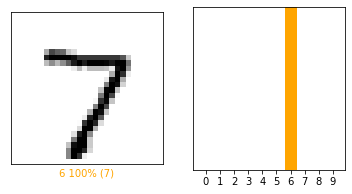

In [196]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, sonuc_tahmin[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, sonuc_tahmin[i], y_test)
plt.show()

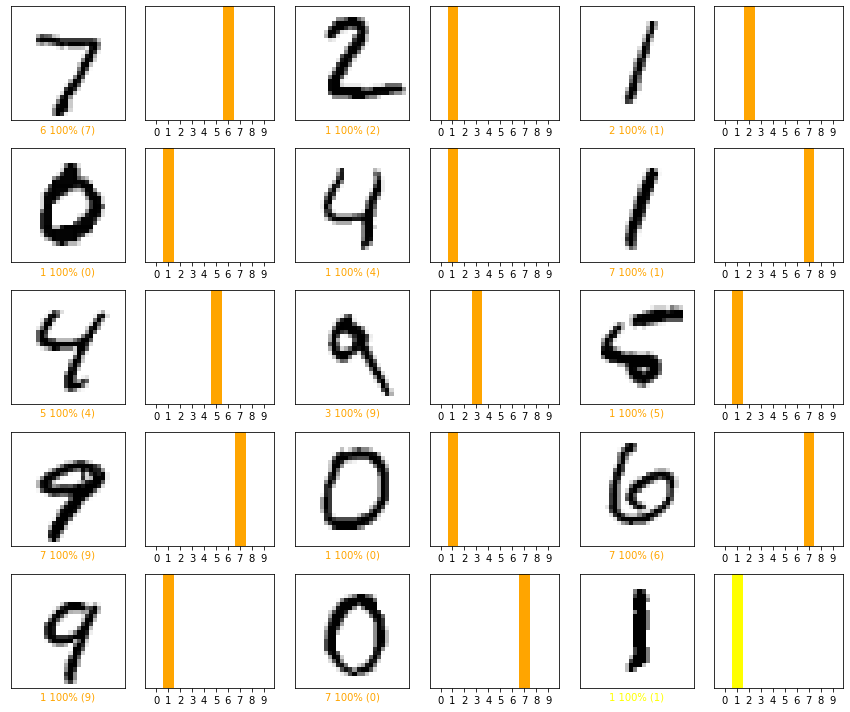

In [197]:


# İlk X test görüntüsünü, tahmin edilen etiketlerini ve gerçek etiketleri çizin.
# Mavi renkte doğru tahminler ve kırmızıda yanlış tahminler.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, sonuc_tahmin[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, sonuc_tahmin[i], y_test)
plt.tight_layout()
plt.show()


In [198]:

# Test veri kümesinden bir görüntü alın.
img = X_test[1]

print(img.shape)

(28, 28)


In [199]:

# Görüntüyü tek üye olduğu bir gruba ekleyin.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)
